Code to remove duplicates that appear after combining different databases (Web of Science, Scopus, Scielo, etc).
This is part of the project described in <https://github.com/amchagas/OSH_papers_DB>, check the project readme for more details.

In [2]:
#import necessary libraries
import os
import pandas as pd
import seaborn as sns
import bibtexparser
import matplotlib.pyplot as plt


In [3]:
#databases output path
dataPath = "../data/"
scopusPath = ["scopus1.bib","scopus2.bib"]
wosPath = ["wos1.bib","wos2.bib","wos3.bib","wos4.bib"]
#wos2Path = "wos_501to835.bib"
scieloPath = "scielo.bib"

#path to store figures
outputPath = "../figures/"

## notes on similarities and differences between the databases

### Document_type vs type

- Scopus sets "document_types" as a column, indicating Articles, proceedings, etc
- Web of Science sets this column as "type".

**Because of the above, we set Scopus to "type" so there aren't two columns with the same kind of data on the joint panda dataframe**

In [4]:
# Open Scopus database
scopusFrames = list()
for i in range(len(scopusPath)):
    with open(dataPath+scopusPath[i]) as scopusFile:
        scopusDatabase = bibtexparser.load(scopusFile)
        scData = pd.DataFrame(scopusDatabase.entries)
        scData = scData.rename(columns={"document_type": "type"})
        scopusFrames.append(scData)

scData = pd.concat(scopusFrames, axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True,sort=False)

scData.to_csv(dataPath+"scData.csv")





In [5]:
#Open Web of Science database

wosFrames = list()
for i in range(len(wosPath)):
    print("running file: " + str(i))
    with open(dataPath+wosPath[i]) as wosFile:
        wosDatabase = bibtexparser.load(wosFile)
        wosFrames.append(pd.DataFrame(wosDatabase.entries))

wosData = pd.concat(wosFrames, axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True,sort=False)

wosData.to_csv(dataPath+"wosData.csv")

running file: 0
running file: 1
running file: 2
running file: 3


In [6]:
#join all databases
allData = pd.concat([wosData,scData], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True,sort=False)

#web of science exports data with {} on every entry. 
# so the next lines clean it up.
for key in allData.keys():
    allData[key]=allData[key].str.replace("{","")
    allData[key]=allData[key].str.replace("}","")

#convert the year string type to int (making it easier to plot histograms)
allData.year = allData.year.astype(int)

allData.to_csv(dataPath+"allData.csv")

In [13]:
len(set(allData.journal[allData.type=="Article"]))

1058


number of articles: 1732



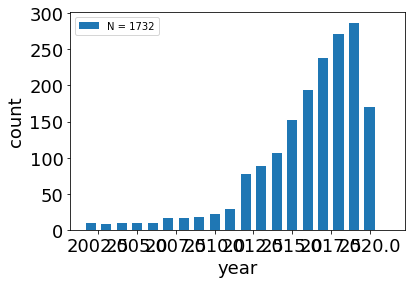

In [14]:

fHandle = allData.year[allData.type=="Article"].plot(kind="hist",
                 fontsize=18,
                 bins=list(set(allData.year+0.5)),
                 rwidth=0.65,
                # color="blue",
                )
fHandle.set(xlabel="Year")
fHandle.axes.xaxis.set_label_text(label="year",fontsize=18)
fHandle.axes.yaxis.set_label_text(label="count",fontsize=18)
fHandle.legend(["N = " + str(len(allData.year[allData.type=="Article"]))])
#fHandle.suptitle("test")

fHandle.figure.savefig(outputPath+ "test.png")


print("\n"+"number of articles: " + str(len(allData.year[allData.type=="Article"]))+ "\n")


In [19]:
print("number of entries:" + str(len(allData)))
print(len(allData.language))


number of entries:4198
4198


In [23]:
allData.head(5)

,da,unique-id,doc-delivery-number,journal-iso,usage-count-since-2013,usage-count-last-180-days,times-cited,number-of-cited-references,funding-text,funding-acknowledgement,...,book-author,source,abbrev_source_title,author_keywords,url,art_number,correspondence_address1,page_count,pubmed_id,coden
0,2020-06-29,ISI:000530303600013,LJ6WQ,IEEE Trans. Power Electron.,15,15,0,42,This work was supported by the Air Force Resea...,Air Force Research Laboratory (AFRL) Intellige...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-29,ISI:000533780900010,LO7BI,Acta Astronaut.,2,2,0,49,The research work detailed in the present pape...,ESAEuropean Space Agency [4000117583/16/NL/HK/as],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-29,ISI:000531095200003,LK8FH,Signal Process.,1,1,0,26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-29,ISI:000521375400033,KW7PA,IEEE Trans. Ind. Electron.,45,45,0,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-29,ISI:000539109600013,LW4JC,Eur. Resp. J.,0,0,0,37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
allData.keys()

Index(['da', 'unique-id', 'doc-delivery-number', 'journal-iso',
       'usage-count-since-2013', 'usage-count-last-180-days', 'times-cited',
       'number-of-cited-references', 'funding-text', 'funding-acknowledgement',
       'author-email', 'web-of-science-categories', 'research-areas',
       'keywords-plus', 'keywords', 'eissn', 'issn', 'doi', 'affiliation',
       'language', 'type', 'address', 'publisher', 'abstract', 'month',
       'pages', 'number', 'volume', 'year', 'journal', 'title', 'author',
       'ENTRYTYPE', 'ID', 'orcid-numbers', 'article-number',
       'researcherid-numbers', 'oa', 'organization', 'note', 'isbn',
       'booktitle', 'book-group-author', 'meeting', 'series', 'editor',
       'esi-hot-paper', 'esi-highly-cited-paper', 'book-author', 'source',
       'abbrev_source_title', 'author_keywords', 'url', 'art_number',
       'correspondence_address1', 'page_count', 'pubmed_id', 'coden'],
      dtype='object')

In [88]:
test = allData.sort_values("title")
for i in range(len(test)):
    print(test.loc[i].title)

Series DC Arc Fault Detection Based on Ensemble Machine Learning
Benchmarking of local feature detectors and descriptors for
multispectral relative navigation in space
Recovery from compressed measurements using Sparsity Independent
Regularized Pursuit
Trajectory Generation of a Two-Wheeled Mobile Robot in an Uncertain
Environment
Low-cost, easy-to-build noninvasive pressure support ventilator for
under-resourced regions: open source hardware description, performance
and feasibility testing
African scientists leverage open hardware
An effective real time gender recognition system for smart cameras
Investigation of LS-MIMO systems with channel aging effects
An IoT-based remote IV tracing system for analysis of city-wide solar
power facilities
Correlation between process openness and collaboration tool usage in
open source hardware design: an empirical study
Towards national policy for open source hardware research: The case of
Finland
An Iterative Refining Approach to Design the Control

Simple modeling of photovoltaic solar cells for indoor harvesting
applications
Low cost and open source multi-fluorescence imaging system for teaching
and research in biology and bioengineering
Deaf people feeling music rhythm by using a sensing and actuating device
Study of LED Thermal Resistance and TIM Evaluation Using LEDs With
Built-in Sensor
A modular CPS architecture design based on ROS and Docker
Photovoltaic Device Performance Evaluation Using an Open-Hardware System
and Standard Calibrated Laboratory Instruments
Non-destructive estimation of above-ground surface and near-surface
biomass using 3D terrestrial remote sensing techniques
Deployment of an open sensorized platform in a smart city context
Hardware for classification of power quality problems in three phase
system using Microcontroller
Bidirectional wavelength-division multiplexing transmission over
installed fibre using a simplified optical coherent access transceiver
Evaluation of the stability of lyophilized loop-m

Hardware Assisted Clock Synchronization for Real-Time Sensor Networks
GSM Downlink Protocol Analysis and Decoding using Open-Source Hardware
and Software
High Resolution 3D Content Creation using Unconstrained and Uncalibrated
Cameras
A HTTP-Enabled Cryptographically Secure Hardware Random Number Generator
Face Identification Using Kinect Technology
Cloud of Secure Elements Perspectives for Mobile and Cloud Applications
Security
Cost Effective Hardware Based Demosaicking Algorithm for Embedded System
A WSN Approach to Unmanned Aerial Surveillance of Traffic Anomalies:
Some Challenges and Potential Solutions
PERFORMANCE VS QUALITY OF EXPERIENCE IN A REMOTE CONTROL APPLICATION
BASED ON REAL-TIME 3D VIDEO FEEDBACK
Assessment of Diagnostic Test for Automated Bug Localization
CORP: An Efficient Protocol to Prevent Data Loss in Mobile Ad-Hoc
Networks
Installation of a variable-angle spectrometer system for monitoring
diffuse and global solar radiation
VR Solutions for Improving Physical Ther

A low cost inventory location identification kiosk for indoor environments using passive RFID tags and open source hardware
Tracking a table tennis ball for umpiring purposes
Energy detection under RF impairments for cognitive radio
SpiderSpec: A low-cost compact colorimeter with IoT functionality
An IoT based service system as a research and educational platfor
Towards standardized wound imaging: Self-calibrating consumer hardware based on lattice detection on color reference cards
Data sharing or resource contention: Toward performance transparency on multicore systems
Reference strings for statistical monitoring of the energy performance of photovoltaic fields
Embedded systems for supporting computer accessibility
Using an open source platform to manage EHV substation protective relays
In-flight testing of a bio-inspired approach for assessment of an UAV outside bounds of nominal design
SNIFFI: A portable development gas sensing embedded system
Design & development of daughter board

Application of virtual interface of interactive teaching materials for children with developmental disabilities
Relyzer: Exploiting application-level fault equivalence to analyze application resiliency to transient faults
Collaboration in open-source hardware: Third-party variations on the arduino duemilanove
Geometrically constrained room modeling with compact microphone arrays
Geometrically constrained room modeling with compact microphone arrays
A simple method for determination of the density of granular materials
A compact and low cost laser induced breakdown spectroscopic system: Application for simultaneous determination of chromium and nickel in steel using multivariate calibration
Advanced diaphragm forming process for high temperature thermoplastic composite applications
The role of photography in dermatology research
Design of an FPGA-based radiation tolerant agent for WorldFIP fieldbus
Small scale spatial heterogeneity of Normalized Difference Vegetation Indices (NDVIs) and

An open-hardware platform for MPSoC thermal modeling
Accuracy of digital dental models using the low-cost DAVID laser scanner
Using low-cost virtual reality simulation to build surgical capacity for cervical cancer treatment
Spectrum Assignment in Hardware-Constrained Cognitive Radio IoT Networks under Varying Channel-Quality Conditions
Smart farming IoT platform based on edge and cloud computing
4th Iberoamerican Workshop on Human-Computer Interaction, HCI-Collab 2018
Reducing energy consumption with iot prototyping
Framing Open Design through Theoretical Concepts and Practical Applications: A Systematic Literature Review
Colloidally stable Silicon quantum dots as temperature biosensors
Colloidally stable silicon quantum dots as temperature biosensors
Exploring the Possibilities of Immersive Reality Tools in Virtual Reconstruction of Monuments
19th International Conference on Embedded Computer Systems: Architectures, Modeling, and Simulation, SAMOS 2019
The potential of low-cost UAVs 

Hardware-based workload forensics and malware detection in microprocessors
Detecting and analyzing code clones in HDL
Building the Internet of Things with bluetooth smart
Improving time synchronization in Wireless Sensor Networks using Bayesian Inference
Augmented reality maintenance training with intel depth camera
EEG in the classroom: Synchronised neural recordings during video presentation
An empirical approach to autonomous GSM BTS based on OSS and OSH
Low cost Ka-band transmitter for CubeSat systems
Bringing Robotics to Formal Education: The Thymio Open-Source Hardware Robot
Project-based physics labs using low-cost open-source hardware
Spurring Innovation in Spatial Haptics: How Open-Source Hardware Can Turn Creativity Loose
Do-It-Yourself Design for Social Robots: An Open-Source Hardware Platform to Encourage Innovation
Design of a low-cost equipment for optical hyperthermia
Analysis and Design of Secure Massive MIMO Systems in the Presence of Hardware Impairments
A miniature d

In [81]:
dupTitle = test[allData.duplicated("title",False)].title
for i in range(len(dupTitle)):
    print(dupTitle[dupTitle.index[i]])

1-D Convolutional Neural Networks for Signal Processing Applications
1-D Convolutional Neural Networks for Signal Processing Applications
A BIST-based solution for the diagnosis of embedded memories adopting
image processing techniques
A BIST-based solution for the diagnosis of embedded memories adopting
image processing techniques
A Build-Your-Own Three Axis CNC PCB Milling Machine
A Build-Your-Own Three Axis CNC PCB Milling Machine
A Compact VLSI System for Bio-Inspired Visual Motion Estimation
A Compact VLSI System for Bio-Inspired Visual Motion Estimation
A Differential Dynamic Positioning Algorithm Based on GPS/Beidou
A Differential Dynamic Positioning Algorithm Based on GPS/Beidou
A Handheld Point-of-Care Genomic Diagnostic System
A Handheld Point-of-Care Genomic Diagnostic System
A Hardware Decoder Architecture for General String Matching Technique
A Hardware Decoder Architecture for General String Matching Technique
A Spectrum Analyzer Based on a Low-Cost Hardware-Software Inte

/home/andre/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


'1-D Convolutional Neural Networks for Signal Processing Applications'